# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/hari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [5]:
# Fetch the Ethereum news articles
eth_news_en = newsapi.get_everything(
    q="etherium",
    language="en"
)

# Function to create a dataframe for btc news and eth news
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError as ae:
            pass

    return pd.DataFrame(articles)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_df(btc_news_en["articles"], "en")
btc_df.head()

,title,description,text,date,language
0,"If you’re a Russian YouTuber, how do you get p...",Russian creators are shut off from the global ...,"When Russia invaded Ukraine, Niki Proshin was ...",2022-03-17,en
1,Why Isn't Bitcoin Booming?,"""Bitcoin was seen by many of its libertarian-l...","""Bitcoin was seen by many of its libertarian-l...",2022-03-12,en
2,Cryptoverse: Remember when bitcoin was 'anonym...,Bitcoin just isn't anonymous enough for a grow...,March 22 (Reuters) - Bitcoin just isn't anonym...,2022-03-22,en
3,CRYPTOVERSE-Bitcoin could be laid low by miner...,Bitcoin miners are feeling the heat - and the ...,Feb 22 (Reuters) - Bitcoin miners are feeling ...,2022-02-22,en
4,Cryptoverse: Bitcoin gains conflict currency c...,Bitcoin has leapt since Russia's invasion of U...,March 1 (Reuters) - Bitcoin has leapt since Ru...,2022-03-01,en


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_df = create_df(eth_news_en["articles"], "en")
eth_df.head()

,title,description,text,date,language
0,ASIC mining: Computers built specifically for ...,ASIC mining machines are designed to mine cryp...,"In cryptocurrency mining, miners need to use c...",2022-03-16,en
1,NFTs worth $1.7M stolen via OpenSea phishing a...,Collectors of NFTs that used OpenSea have been...,AppleInsider is supported by its audience and ...,2022-02-20,en
2,What’s the best NFT crypto for your art? (Marc...,What's the best crypto for NFT art? Learn how ...,Getting started with how to pick the best NFT ...,2022-03-03,en
3,Roblox Players Are Mining Crypto Just to Get R...,The underground tools mine cryptocurrency and ...,"Everyone wants more Robux, the in-game currenc...",2022-03-09,en
4,What is Web3? The Definition of Web 3.0,"Defining Web3 Cryptocurrencies, NFTs (nonfungi...","Cryptocurrencies, NFTs (nonfungible tokens), b...",2022-03-21,en


In [8]:
len(eth_df.text[0])

214

In [9]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [10]:
# Sentiment scores dictionaries
i = 0
for df in [btc_df,eth_df]:
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": [],
        "title_sent": [],
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": [],
        "text_sent": [],
    }

    # Get sentiment for the text and the title
    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass

    # Attaching sentiment columns to the News DataFrame
    if i == 0:
        btc_sent_df = df
        title_sentiment_df = pd.DataFrame(title_sent)
        text_sentiment_df = pd.DataFrame(text_sent)
        news_btc_df = btc_sent_df.join(title_sentiment_df).join(text_sentiment_df)
        i += 1
    elif i == 1:
        eth_sent_df = df
        title_sentiment_df = pd.DataFrame(title_sent)
        text_sentiment_df = pd.DataFrame(text_sent)
        news_eth_df = eth_sent_df.join(title_sentiment_df).join(text_sentiment_df)



In [11]:
# Describe the Bitcoin Sentiment
news_btc_df.describe()
#len(btc_news_en['articles'][0]['content'])


,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,-0.065825,0.058700,0.843100,0.098150,-0.100000,0.089135,0.062250,0.90075,0.036950,0.200000
std,0.257567,0.094908,0.175356,0.147241,0.718185,0.419499,0.051929,0.07350,0.061744,0.894427
min,-0.599400,0.000000,0.515000,0.000000,-1.000000,-0.771300,0.000000,0.73900,0.000000,-1.000000
25%,-0.126200,0.000000,0.780250,0.000000,-1.000000,-0.140475,0.000000,0.85250,0.000000,-1.000000
50%,0.000000,0.000000,0.859500,0.000000,0.000000,0.064000,0.068500,0.90250,0.000000,0.500000
75%,0.006450,0.135250,1.000000,0.213750,0.000000,0.430825,0.092750,0.95250,0.051250,1.000000
max,0.318200,0.247000,1.000000,0.438000,1.000000,0.636900,0.171000,1.00000,0.187000,1.000000


In [12]:
# Describe the Ethereum Sentiment
news_eth_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.126020,0.12060,0.829900,0.049500,0.25000,0.206085,0.082050,0.887550,0.030400,0.450000
std,0.346379,0.15510,0.187031,0.119883,0.71635,0.379860,0.069913,0.082378,0.050787,0.825578
min,-0.659700,0.00000,0.379000,0.000000,-1.00000,-0.542300,0.000000,0.720000,0.000000,-1.000000
25%,0.000000,0.00000,0.713500,0.000000,0.00000,0.000000,0.031500,0.852750,0.000000,0.000000
50%,0.000000,0.00000,0.842000,0.000000,0.00000,0.225550,0.074500,0.880000,0.000000,1.000000
75%,0.295200,0.23275,1.000000,0.000000,1.00000,0.483450,0.119500,0.950500,0.052250,1.000000
max,0.851900,0.43700,1.000000,0.477000,1.00000,0.826800,0.251000,1.000000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Etherium has title_pos mean score of 0.136100 and text_pos mean score of 0.08225

Q: Which coin had the highest compound score?

A: Etherium has title_compound max score of 0.08225 and text_compound max score of 0.826800

Q. Which coin had the highest positive score?

A: Etherium has title_pos score of 0.437000 and text_pos score of 0.25100

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [26]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_list = ['was','also','has']
sw = sw.union(sw_list)

In [27]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
   
    # Create a tokenized list of the words
    text_tokens = word_tokenize(text)
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [46]:
# Create a new tokens column for Bitcoin
btc_tokens = []
for article in range(0,len(btc_news_en["articles"])):    
    btc_tokens.append(tokenizer(btc_df.text[article]))

btc_col = [item for sublist in btc_tokens for item in sublist]


In [53]:
# Create a new tokens column for Ethereum
eth_tokens = []
for article in range(0,len(eth_news_en["articles"])):    
    eth_tokens.append(tokenizer(eth_df.text[article]))
eth_col = [item for sublist in eth_tokens for item in sublist]

['cryptocurrency',
 'mining',
 'miner',
 'need',
 'use',
 'computer',
 'solve',
 'incredibly',
 'complex',
 'puzzle',
 'person',
 'solves',
 'puzzle',
 'first',
 'awarded',
 'cryptocurrency',
 'powerful',
 'computer',
 'ha',
 'gre',
 'char',
 'appleinsider',
 'supported',
 'audience',
 'may',
 'earn',
 'commission',
 'amazon',
 'associate',
 'affiliate',
 'partner',
 'qualifying',
 'purchase',
 'affiliate',
 'partnership',
 'influence',
 'editorial',
 'con',
 'char',
 'getting',
 'started',
 'pick',
 'best',
 'nft',
 'cryptocurrency',
 'art',
 'challenging',
 'come',
 'world',
 'nfts',
 'feel',
 'like',
 'reason',
 'logic',
 'thrown',
 'window',
 'wh',
 'char',
 'everyone',
 'want',
 'robux',
 'ingame',
 'currency',
 'hyperpopular',
 'roblox',
 'ecosystem',
 'players',
 'earn',
 'digital',
 'cash',
 'trading',
 'item',
 'theyve',
 'acquired',
 'playing',
 'certain',
 'roblox',
 'game',
 'creating',
 'char',
 'cryptocurrencies',
 'nfts',
 'nonfungible',
 'token',
 'blockchain',
 'daos',

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [30]:
from collections import Counter
from nltk import ngrams

In [31]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = ngrams(btc_col, 2)

In [32]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = ngrams(eth_col, 2)

In [33]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [34]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(btc_bigrams,10)

In [35]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(eth_bigrams,10)
top_10_eth

[(('march', 'reuters'), 7),
 (('reuters', 'bitcoin'), 5),
 (('char', 'march'), 3),
 (('russia', 'invaded'), 2),
 (('invaded', 'ukraine'), 2),
 (('char', 'bitcoin'), 2),
 (('char', 'feb'), 2),
 (('feb', 'reuters'), 2),
 (('bitcoin', 'ha'), 2),
 (('since', 'russias'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 5.0]

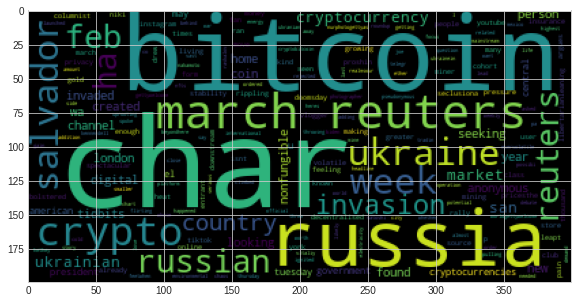

In [48]:
# Generate the Bitcoin word cloud
btc_words = ' '.join(btc_col)
wc_btc = WordCloud().generate(btc_words)
plt.imshow(wc_btc)

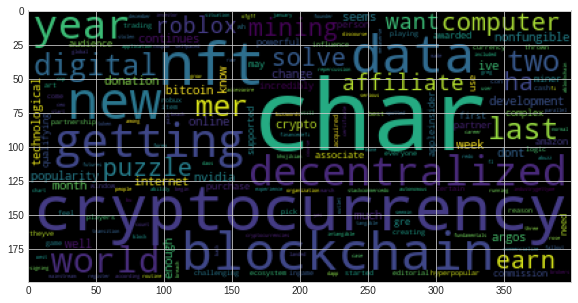

In [54]:
# Generate the Ethereum word cloud
eth_words = ' '.join(eth_col)
wc_eth = WordCloud().generate(eth_words)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [55]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [56]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [58]:
# Concatenate all of the Bitcoin text together
btc_words

'russia invaded ukraine niki proshin wa already year making living vlogger youtube channel tiktok channel instagram ran online russian club char bitcoin wa seen many libertarianleaning fan kind doomsday insurance argues columnist new york times form digital gold would source stability char march reuters bitcoin isnt anonymous enough growing cohort crypto user seeking greater seclusiona volatile class crypto known privacy coin created p char feb reuters bitcoin miner feeling heat pain rippling downstream pressure pricesthe cryptocurrencys spectacular rally drew thousand entrant mining char march reuters bitcoin ha leapt since russias invasion ukraine bolstered people country looking store move money anonymous decentralised cryptobitcoin tradin char whose side cryptocurrency asked satoshi nakamoto pseudonymous person person created bitcoin platform hethey likely would rejected question char heres happened week crypto worldgettywelcome nonfungible tidbits weekly roundup news crypto nfts r

In [59]:
# Run the NER processor on all of the text
doc = nlp(btc_words)

# Add a title to the document
# YOUR CODE HERE!

In [60]:
# Render the visualization
displacy.render(doc, style='ent')

In [62]:
# List all Entities
entities = [ent.text for ent in doc.ents ]
entities

['russia',
 'russian',
 'new york',
 'reuters',
 'reuters',
 'thousand',
 'reuters',
 'weekly',
 'week',
 'focus week',
 'russian',
 'russia',
 'last thursday',
 'mexico city',
 'london',
 'reuters',
 'russia',
 'russia',
 'chart l char',
 'reuters',
 'joe biden',
 'kennerdell pa',
 'reuters',
 'london',
 'reuters',
 'tuesday',
 'almost three week',
 'reuters',
 'san salvador',
 'el salvador',
 'american',
 'tom lee',
 'tuesday',
 'russians',
 'san salvador',
 'reuters',
 'el salvador',
 'nayib',
 'sunday',
 'congress',
 'american',
 'one',
 'first',
 'san jose',
 'year']

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
eth_words

In [63]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_words)

# Add a title to the document
# YOUR CODE HERE!

In [64]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [65]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents ]
eth_entities

['first',
 'gre',
 'year',
 'two',
 'last couple month',
 'two',
 'last month',
 'three',
 'january mer',
 'one',
 'south american',
 'russian',
 'ukraine week ago',
 'past year',
 'last two year',
 'dutch']

---